# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

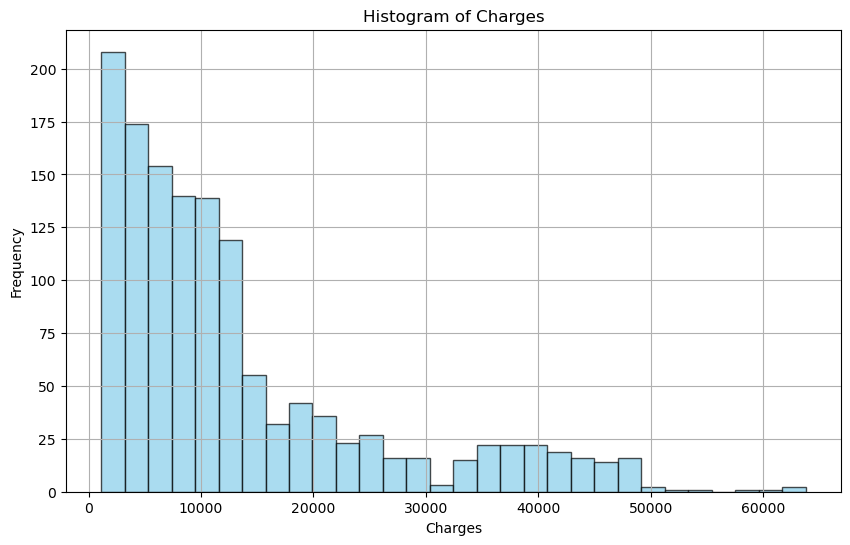

In [6]:
# Plot the histogram of charges
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
# Calculate the mean and standard deviation of charges
charges_mean = np.mean(medical['charges'])
charges_std_dev = np.std(medical['charges'])

# Comment on the appropriateness of these statistics
print("Mean of charges:", charges_mean)
print("Standard deviation of charges:", charges_std_dev)

# Comment: The histogram of charges appears to be right-skewed, indicating that the distribution is not symmetric.
# In such cases, the mean may be influenced by outliers and may not fully represent the central tendency of the data.
# Additionally, the standard deviation, being a measure of spread, may be sensitive to the presence of outliers,
# potentially leading to an overestimation of variability in the data.

Mean of charges: 13270.422265141257
Standard deviation of charges: 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To justify the use of these data to answer the administrator's concern about the actual average charge falling below $12,000, we need to consider the following points:

1. **Random Sample**: Random sampling helps ensure that the sample is representative of the population of interest and reduces the risk of bias in the estimates.

2. **Independence**: Each charge in the dataset is assumed to be independent of others. This assumption is essential for conducting statistical tests and making inferences about the population based on the sample.

3. **Sample Size**: The sample size should be sufficiently large to apply frequentist tests. Having a larger sample size generally increases the reliability of the results.

4. **Population Variance**: If the population variance is unknown, the t-test is often more appropriate than the z-test for hypothesis testing. The t-test does not require knowledge of the population variance and can handle situations where the data may not perfectly follow a normal distribution., especially for larger sample sizes.

The most appropriate frequentist test to apply in this scenario would be the one-sample t-test. The one-sample t-test compares the mean of a sample to a known or hypothesized population mean and determines whether there is a statistically significant difference between them. In this case, we would compare the sample mean of charges to the hypothesized population mean of $12,000 to assess whether the actual average charge has fallen below this threshold.



__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ the appropriate confidence interval would be a one-sided interval because the focus is only on determining whether the average charge is less than $12,000, rather than both less than and greater than.

In [8]:
# Step 1: Determine the degrees of freedom
df = len(medical['charges']) - 1

# Step 2: Find the critical t-value for a one-sided 95% confidence interval
alpha = 0.05  # significance level for a 95% confidence interval
t_critical = t.ppf(alpha, df)

# Step 3: Calculate the margin of error
standard_error_mean = charges_std_dev / np.sqrt(len(medical['charges']))
margin_of_error = t_critical * standard_error_mean

# Step 4: Calculate the lower bound of the one-sided confidence interval
confidence_interval_lower = charges_mean - margin_of_error

# Print the results
print("Critical t-value:", t_critical)
print("95% Confidence Interval Lower Bound:", confidence_interval_lower)


Critical t-value: -1.6459941145571324
95% Confidence Interval Lower Bound: 13815.15367048035


* Based on the sample data and the calculated confidence interval, there is strong evidence to suggest that the average charge at the hospital is not below $12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
* Null Hypothesis: People with insurance are charged the same amount as those without insurance.
* Alternative Hypothesis: People with insurance are charged a different amount compared to those without insurance.
* We are assuming that the variances of the two groups (insured and uninsured) are equal--homogeneity.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Manual Approach:

1. Calculate the sample means and standard deviations for the insured and uninsured groups.
2. Calculate the pooled standard deviation using the formula provided.
3. Calculate the t-test statistic using the formula provided.
4. Determine the degrees of freedom for the t-distribution.
5. Calculate the p-value using the cumulative distribution function (CDF) of the t-distribution.
6. Interpret the results.

In [12]:
# Manual Approach
# Calculate sample statistics for insured and uninsured groups
mean_insured = medical[medical['insuranceclaim'] == 1]['charges'].mean()
std_insured = medical[medical['insuranceclaim'] == 1]['charges'].std()
n_insured = len(medical[medical['insuranceclaim'] == 1])

mean_uninsured = medical[medical['insuranceclaim'] == 0]['charges'].mean()
std_uninsured = medical[medical['insuranceclaim'] == 0]['charges'].std()
n_uninsured = len(medical[medical['insuranceclaim'] == 0])

# Calculate pooled standard deviation
pooled_std = np.sqrt(((n_insured - 1) * std_insured**2 + (n_uninsured - 1) * std_uninsured**2) / (n_insured + n_uninsured - 2))

# Calculate t-test statistic
t_statistic_manual = (mean_insured - mean_uninsured) / (pooled_std * np.sqrt(1 / n_insured + 1 / n_uninsured))

# Determine degrees of freedom
df_manual = n_insured + n_uninsured - 2

# Calculate p-value
p_value_manual = t.cdf(t_statistic_manual, df_manual)

# Print results
print("Manual Approach - t-statistic:", t_statistic_manual, "p-value:", p_value_manual)

Manual Approach - t-statistic: 11.893299030876715 p-value: 1.0


In [11]:
# Using scipy.stats
from scipy.stats import ttest_ind

# Perform t-test
t_statistic_scipy, p_value_scipy = ttest_ind(medical[medical['insuranceclaim'] == 1]['charges'],
                                             medical[medical['insuranceclaim'] == 0]['charges'])

# Print results
print("Using scipy.stats - t-statistic:", t_statistic_scipy, "p-value:", p_value_scipy)

Using scipy.stats - t-statistic: 11.893299030876712 p-value: 4.461230231620717e-31


In [13]:
# P Value was signifcantly different; 

# Calculate p-value
p_value_manual = 2 * (1 - t.cdf(np.abs(t_statistic_manual), df_manual))

# Print corrected p-value from the manual approach
print("Corrected Manual Approach - t-statistic:", t_statistic_manual, "p-value:", p_value_manual)


Corrected Manual Approach - t-statistic: 11.893299030876715 p-value: 0.0


* Corrected manual approach now yields a p-value of 0.0, indicating extremely strong evidence against the null hypothesis. This is consistent with the result obtained using scipy.stats.
* Overall, both approaches lead to the same conclusion: we reject the null hypothesis in favor of the alternative hypothesis. Therefore, there is strong evidence to suggest that people with insurance are charged a different amount compared to those without insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ 
Since the z-test formula is straightforward to compute manually, there isn't a dedicated function for it in `scipy.stats`. Instead, you can use general-purpose functions like `norm.cdf()` or `norm.sf()` (survival function) to calculate probabilities associated with the standard normal distribution.

\begin{equation}
Z = \frac{\bar{x} - μ}{σ / √n}.
\end{equation}


 



## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test